# Problem Statement

Detailed Business Case: 
In corporate world, Cyberloafing has become the most common malpractice these days in which employees use the Internet at workplaces for personal use while pretending to do legitimate work. 
Currently, companies are unable to find:
1.	Employees indulged in Cyberloafing and the extent of Cyberloafing.
2.	Influential Elements responsible for Cyberloafing.
3.	Impact of Cyberloafing on Productivity.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#libraries to be used
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
%matplotlib inline
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import requests

# Importing Data and Preprocessing

In [3]:
# Getting Data pulled from the Database
url = "https://falcons-cyber.firebaseio.com/train.json"
r = requests.get(url)
v = r.json()

In [4]:
trans=pd.DataFrame(v)
df=trans.T
df.head()

,age,employeeId,gender,internetUseEnjoyable,internetUseProductive,jobChallenging,jobEngaging,leisureTimeThingsToDo,monotonousAndBoring,monotonousAndTiring,...,needShortBreak,overTime,overallJobSatisfaction,peopleAroundUsesInternet,platformUsedOnInternet,productionScore,prominentTimeOfInternetUse,taskCompleted,timeSpentOnInternet,unnecessaryTeamMeetings
Ajaykbansal68,51,Ajaykbansal68,1,1,1,4,4,1,1,4,...,2,2,4,2,3,9,2,2,2,1
Chetankg42,23,Chetankg42,1,4,4,4,4,2,5,4,...,5,5,3,3,1,4,4,5,4,1
aartichahar2565,24,aartichahar2565,0,3,3,5,4,1,1,1,...,4,1,4,1,1,9,3,5,2,2
abdulmuwahib,20,abdulmuwahib,1,4,3,4,4,1,4,4,...,4,3,4,3,1,6,2,3,4,3
abhi012355,22,abhi012355,1,4,2,2,3,2,4,3,...,2,4,3,2,1,6,4,4,4,2


In [5]:
df.shape

(110, 21)

In [6]:
df.dropna(how='any',subset=['name'],inplace=True,axis=0)
df.head()

,age,employeeId,gender,internetUseEnjoyable,internetUseProductive,jobChallenging,jobEngaging,leisureTimeThingsToDo,monotonousAndBoring,monotonousAndTiring,...,needShortBreak,overTime,overallJobSatisfaction,peopleAroundUsesInternet,platformUsedOnInternet,productionScore,prominentTimeOfInternetUse,taskCompleted,timeSpentOnInternet,unnecessaryTeamMeetings
Ajaykbansal68,51,Ajaykbansal68,1,1,1,4,4,1,1,4,...,2,2,4,2,3,9,2,2,2,1
Chetankg42,23,Chetankg42,1,4,4,4,4,2,5,4,...,5,5,3,3,1,4,4,5,4,1
aartichahar2565,24,aartichahar2565,0,3,3,5,4,1,1,1,...,4,1,4,1,1,9,3,5,2,2
abdulmuwahib,20,abdulmuwahib,1,4,3,4,4,1,4,4,...,4,3,4,3,1,6,2,3,4,3
abhi012355,22,abhi012355,1,4,2,2,3,2,4,3,...,2,4,3,2,1,6,4,4,4,2


In [7]:
df.shape

(110, 21)

In [8]:
df.reset_index(inplace=True,drop=True)
df.drop([0,1,2],axis=0,inplace=True)

# Factor Analysis

In [9]:
fact=df[['timeSpentOnInternet','leisureTimeThingsToDo','monotonousAndBoring','unnecessaryTeamMeetings',
         'needShortBreak','taskCompleted','overTime','peopleAroundUsesInternet','internetUseEnjoyable']]
fact=fact.astype('int')
fact.head()

,timeSpentOnInternet,leisureTimeThingsToDo,monotonousAndBoring,unnecessaryTeamMeetings,needShortBreak,taskCompleted,overTime,peopleAroundUsesInternet,internetUseEnjoyable
3,4,1,4,3,4,3,3,3,4
4,4,2,4,2,2,4,4,2,4
5,4,2,1,1,4,5,1,2,1
6,4,2,2,4,4,5,5,3,2
7,2,1,4,2,3,5,4,4,3


In [10]:
#P-Value Test
chi_square_value,p_value=calculate_bartlett_sphericity(fact)
chi_square_value, p_value

(120.4426345012754, 1.7777470972902128e-11)

In [11]:
#KMO TEST
kmo_all,kmo_model=calculate_kmo(fact)
print(kmo_model)

0.6138712856653359


In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(fact)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)
print(v)

[2.26332314 1.30783279 1.17778085 1.08039372 0.80442134 0.77586931
 0.63570008 0.53940815 0.41527061]
[ 1.80654302  0.66755935  0.60108769  0.25920178  0.09100451  0.01129445
 -0.07134644 -0.13207673 -0.16445426]


In [13]:
eigen=[]
for i in range(0,len(ev)):
    if ev[i]>=1:
        eigen.append(ev[i])

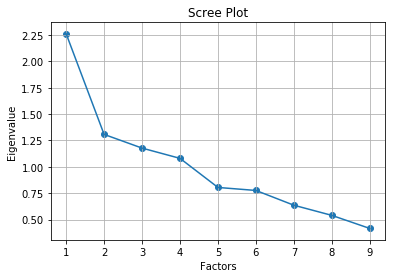

<Figure size 432x288 with 0 Axes>

In [14]:
#Plotting Scree Plot
plt.scatter(range(1,fact.shape[1]+1),ev)
plt.plot(range(1,fact.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
plt.savefig('Scree_PLot.png')

In [15]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(n_factors=len(eigen),rotation='Varimax',method='principal')
fa1.fit(fact)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='principal', n_factors=4, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [16]:
fa1.loadings_

array([[-0.00558197,  0.54561573,  0.54348254,  0.10353955],
       [ 0.01326476, -0.17041903,  0.83666344, -0.05749035],
       [ 0.77577191,  0.11062645, -0.32203959, -0.07457769],
       [ 0.73887875, -0.02601727,  0.25474308, -0.08030555],
       [ 0.58352401,  0.26492006, -0.03949608,  0.02018587],
       [-0.06736729,  0.05197682, -0.04273293,  0.91214814],
       [ 0.63993676, -0.16775548,  0.08859579,  0.47420821],
       [ 0.03278122,  0.77963813, -0.24922876, -0.11950409],
       [ 0.39263858,  0.53330453,  0.07808792,  0.31239274]])

In [17]:
fa1.get_factor_variance()

(array([2.05776832, 1.33292974, 1.24343047, 1.19520198]),
 array([0.22864092, 0.1481033 , 0.13815894, 0.13280022]),
 array([0.22864092, 0.37674423, 0.51490317, 0.64770339]))

In [18]:
factor_names=['Boredom','Work Completed','Work Environment','Habit']
factor=pd.DataFrame({'Factors':factor_names,'Eigen_Value':eigen})
factor.head()

,Factors,Eigen_Value
0,Boredom,2.263323
1,Work Completed,1.307833
2,Work Environment,1.177781
3,Habit,1.080394


C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


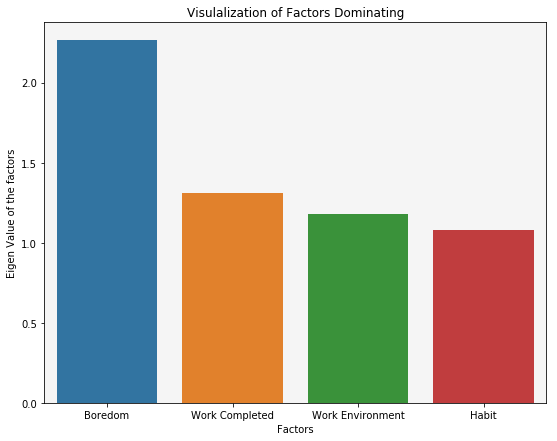

In [19]:
plt.figure(figsize=(9,7))
sns.barplot(x='Factors',y='Eigen_Value',data=factor)
ax=plt.axes()
plt.title('Visulalization of Factors Dominating')
ax.set_facecolor('whitesmoke')
plt.ylabel('Eigen Value of the factors')
plt.savefig('Factor.png')

# Cluster Analysis

In [20]:
clus=df[['timeSpentOnInternet','peopleAroundUsesInternet','internetUseEnjoyable','name']]
clus.head()

,timeSpentOnInternet,peopleAroundUsesInternet,internetUseEnjoyable,name
3,4,3,4,Abdul Muwahib
4,4,2,4,Abhishek Kumar
5,4,2,1,Abhishek goyal
6,4,3,2,Abhishek Bajpai
7,2,4,3,Abhishek Jagga


In [21]:
clus.set_index('name',inplace=True)
clus.head()

,timeSpentOnInternet,peopleAroundUsesInternet,internetUseEnjoyable
name,,,
Abdul Muwahib,4,3,4
Abhishek Kumar,4,2,4
Abhishek goyal,4,2,1
Abhishek Bajpai,4,3,2
Abhishek Jagga,2,4,3


## Drendogram

C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


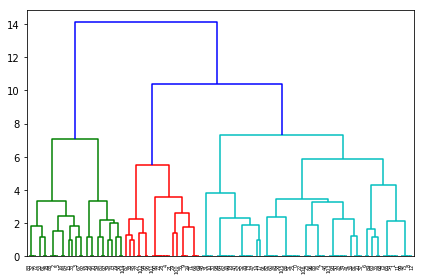

In [25]:
plt.figure()
# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(clus, method='ward'))
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig('Drendogram.png')

In [26]:
# Using Hierarichal Clustering
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(clus)
print(y_hc)

[0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [27]:
# Using K-Means CLustering
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(clus)
print(y_kmeans)

[0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1]


In [28]:
a=pd.DataFrame({'Cyberloafer Type':y_kmeans,'Name of the Employee':df['name']})

C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


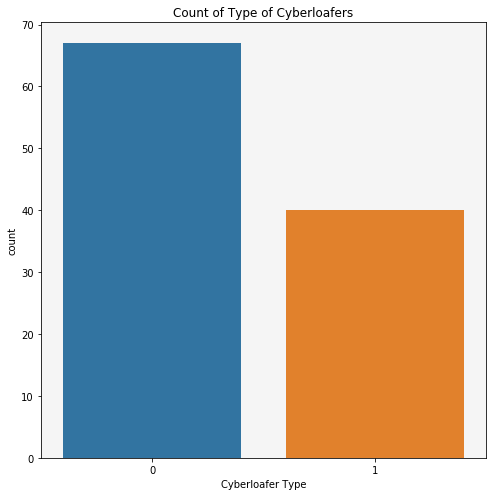

In [29]:
# Countplot
plt.figure(figsize=(7,7))
sns.countplot(a['Cyberloafer Type'])
plt.title('Count of Type of Cyberloafers')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
plt.savefig('Count.png')

In [30]:
a.set_index('Name of the Employee',inplace=True)
a.head()

,Cyberloafer Type
Name of the Employee,
Abdul Muwahib,0
Abhishek Kumar,0
Abhishek goyal,1
Abhishek Bajpai,1
Abhishek Jagga,0


In [31]:
a['Cyberloafer Type']=a['Cyberloafer Type'].map({0:'Low Cyberloafer',1:'High Cyberloafer'})
a.head()

,Cyberloafer Type
Name of the Employee,
Abdul Muwahib,Low Cyberloafer
Abhishek Kumar,Low Cyberloafer
Abhishek goyal,High Cyberloafer
Abhishek Bajpai,High Cyberloafer
Abhishek Jagga,Low Cyberloafer


In [32]:
clus['Cyberloafer Type']=a['Cyberloafer Type']

In [33]:
clus.head()

,timeSpentOnInternet,peopleAroundUsesInternet,internetUseEnjoyable,Cyberloafer Type
name,,,,
Abdul Muwahib,4,3,4,Low Cyberloafer
Abhishek Kumar,4,2,4,Low Cyberloafer
Abhishek goyal,4,2,1,High Cyberloafer
Abhishek Bajpai,4,3,2,High Cyberloafer
Abhishek Jagga,2,4,3,Low Cyberloafer


# Predicting The New Data Entries

In [34]:
X=clus[['timeSpentOnInternet','peopleAroundUsesInternet','internetUseEnjoyable']]
y=clus['Cyberloafer Type']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("X_train shape: "+str(X_train.shape))
print("X_test shape: "+str(X_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

X_train shape: (80, 3)
X_test shape: (27, 3)
y_train shape: (80,)
y_test shape: (27,)


In [36]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [37]:
out=pd.DataFrame({'Cyberloafer Type':knn_pred,'Name':X_test.index})
out.set_index('Name',inplace=True)

In [38]:
out.head()

,Cyberloafer Type
Name,
Harsangeet Singh,High Cyberloafer
Akshu Gupta,Low Cyberloafer
radhey sham,Low Cyberloafer
Abhishek goyal,High Cyberloafer
Shweta,Low Cyberloafer


# Relation between Productivity and Cyberloafing

In [39]:
df4=df[['productionScore','name']]

In [40]:
df4.set_index('name',inplace=True)

In [41]:
prod=pd.concat([out,df4],axis=1)
prod.dropna(how='any',subset=['productionScore'],axis=0,inplace=True)
prod['productionScore']=prod['productionScore'].astype(int)

C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\saurabh\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


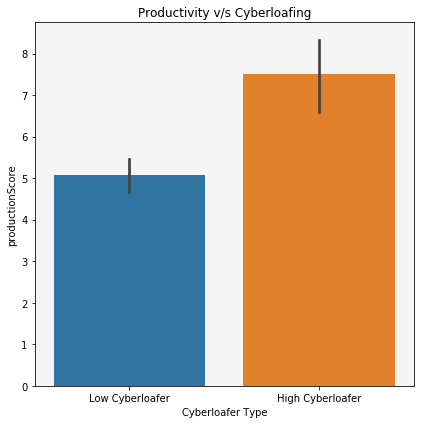

In [42]:
plt.figure(figsize=(6,6))
sns.barplot(x=prod['Cyberloafer Type'],y=prod['productionScore'])
plt.title('Productivity v/s Cyberloafing')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
#plt.savefig('Prod.png')